In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [147]:
df=pd.read_excel("Loan Dataset.xlsx")

In [148]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#**Data Cleaning and Transformation**

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [150]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [152]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [153]:
df["Dependents"].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [154]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [155]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [156]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
df["Self_Employed"]=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [159]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<Axes: >

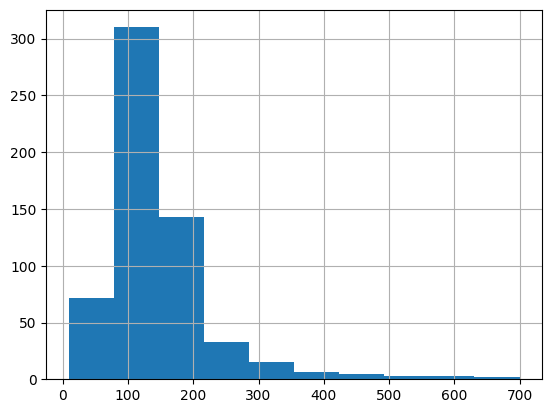

In [160]:
df['LoanAmount'].hist()

In [161]:
df['LoanAmount']=df["LoanAmount"].fillna(df["LoanAmount"].median())

<Axes: >

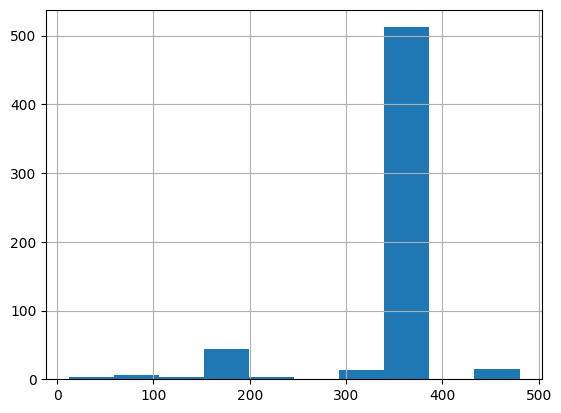

In [162]:
df['Loan_Amount_Term'].hist()

<Axes: >

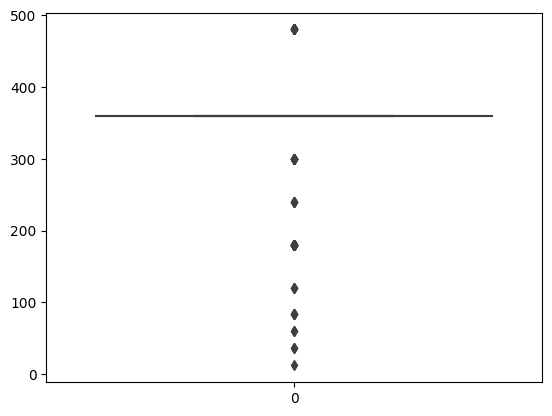

In [30]:
sns.boxplot(df['Loan_Amount_Term'])

In [27]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [163]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [164]:
df["Credit_History"].dtype

dtype('float64')

In [165]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [166]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [167]:
df["Credit_History"]=df["Credit_History"].astype('int')

In [168]:
df["Credit_History"].dtype

dtype('int64')

In [169]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#**Feature Engineering**

In [170]:
df["LoanAmount"].skew()

2.743052748820892

In [171]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

<Axes: >

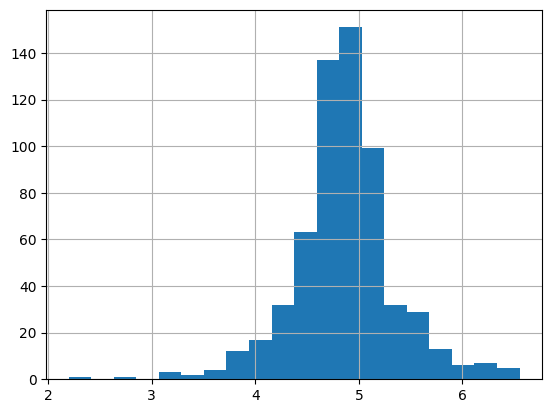

In [172]:
df['LoanAmount_log'].hist(bins=20)

In [173]:
df['LoanAmount_log'].skew()

-0.19535529039255162

In [174]:
df['TotalIncome']=df["ApplicantIncome"]+df['CoapplicantIncome']

<Axes: >

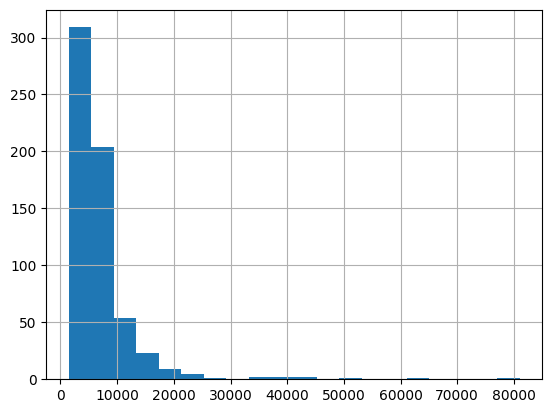

In [175]:
df['TotalIncome'].hist(bins=20)

In [176]:
df['TotalIncome'].skew()

5.633448514884535

<Axes: >

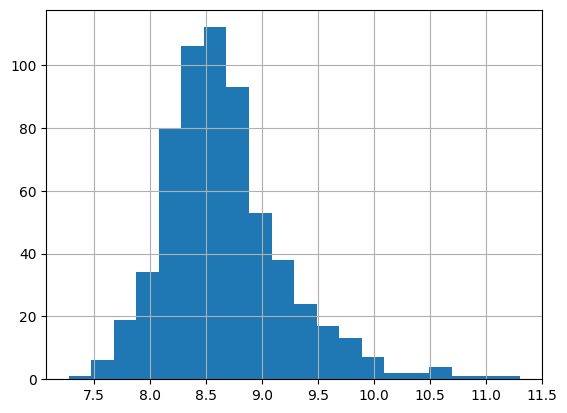

In [177]:
df['Total_income_log']=np.log(df['TotalIncome'])
df['Total_income_log'].hist(bins=20)

In [178]:
df['Total_income_log'].skew()

1.0767023443049968

**Yeo Johnson Transformation can be applied to Right skewed or left skewed data**

In [179]:
from sklearn.preprocessing import PowerTransformer

# Create a PowerTransformer with the Yeo-Johnson option
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform the data
transformed_total_income = yeo_johnson_transformer.fit_transform(df[['TotalIncome']])

# Update the DataFrame with the transformed column
df['Total_income_Xeo']= transformed_total_income

In [180]:
df['Total_income_Xeo'].skew()

-0.03463598741361318

In [181]:
df['Loan_Amount_Term'].skew()

-2.4021122563890396

In [182]:
df['Loan_Amount_Term_exp']=np.exp(df['Loan_Amount_Term'])

<Axes: >

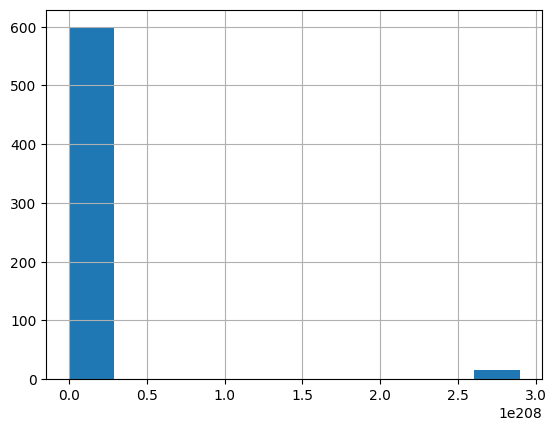

In [183]:
df['Loan_Amount_Term_exp'].hist()

In [184]:
from sklearn.preprocessing import PowerTransformer

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson', standardize=False)


transformed_loan_amount_term = yeo_johnson_transformer.fit_transform(df[['Loan_Amount_Term']])


df['Loan_Amount_Term_Xeo']=transformed_loan_amount_term

In [185]:
df['Loan_Amount_Term_Xeo'].skew()

0.3925713419856925

<Axes: >

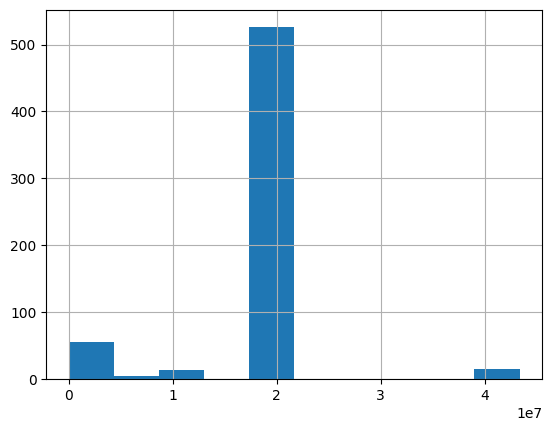

In [186]:
df['Loan_Amount_Term_Xeo'].hist()

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    int64  
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  LoanAmount_log        614 non-null    float64
 14  TotalIncome           614 non-null    float64
 15  Total_income_log      6

In [189]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'Total_income_log', 'Total_income_Xeo',
       'Loan_Amount_Term_exp', 'Loan_Amount_Term_Xeo'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  LaonAmount         614 non-null    float64
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  Total_income_log   614 non-null    float64
dtypes: float64(6), int64(2), o

In [67]:
df.drop('TotalIncome',axis=1,inplace=True)

In [190]:
df['Credit_History'].unique()

array([1, 0])

In [210]:
#Seperate the features and the target variable
X=df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area','LoanAmount_log', 'Total_income_Xeo', 'Loan_Amount_Term_Xeo']]
y=df["Loan_Status"]

#Convert the categorical variable into Numerical Data using One shot encoding
X=pd.get_dummies(X,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History'])

In [211]:
#Split the data into Training and Testing Sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#**Random Forest Classifier**

In [193]:
#Modelling

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [194]:
#Make predictions on the testing data
y_pred=model.predict(X_test)

In [196]:
#Evaluation
from sklearn.metrics import accuracy_score
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.7642276422764228


#**Decision Tree Classifier**

In [201]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)


#Make predictions on testing data
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.6910569105691057


#**Logistic Regression**

In [202]:
#Modelling
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

#Predicting the values
y_pred=model.predict(X_test)

#Evaluate the model performance
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy Score: 0.6504065040650406
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**kNN Classifier**

In [203]:
#Modelling
#Initialize a kNN classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()  #by default n_neighbors=5=5/KNeighborsClassifier(n_neighbors=i)
model.fit(X_train,y_train)

#Prediction and Evaluation
from sklearn.metrics import accuracy_score

ypred_test=model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Test Accuracy: 0.6991869918699187


#**XGBoost Classifier**

In [206]:
#Seperate the features and the target variable
X=df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area','LoanAmount_log', 'Total_income_Xeo', 'Loan_Amount_Term_Xeo']]
y=df["Loan_Status"]

#Convert the categorical variable into Numerical Data using One shot encoding
X=pd.get_dummies(X,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History'])



from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["Loan_Status"])


#Split the data into Training and Testing Sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#Modelling of XGBoost
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train,y_train)


#Make prediction on the testing data
y_pred=model.predict(X_test)


#Evaluate the model performance
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7642276422764228


#**SVM Classifier**

In [209]:
#Modelling
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)


#Make predictions on the testing data
y_pred=model.predict(X_test)
ypred_train= model.predict(X_train)

#Calculate Evaluation Metrics

from sklearn.metrics import accuracy_score
print("Test Accuracy:",accuracy_score(y_test,y_pred))
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

Test Accuracy: 0.6260162601626016
Train Accuracy: 0.7087576374745418


#**Naive Bayes Classifier**

In [212]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()  #by default n_neighbors=5=5/KNeighborsClassifier(n_neighbors=i)
model.fit(X_train,y_train)

#Prediction and Evaluation
from sklearn.metrics import accuracy_score

ypred_test=model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,ypred_test))

Test Accuracy: 0.5772357723577236


**Conclusion: For the prediction of Loan Approval- Random Forest Classifier and XGBoost Classifier gives the maximum accuracy score of 76%.**